# 🏡 Linear Regression: Housing Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Housing.csv")
df.head()

Saving Housing.csv to Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [4]:
# Multiple Linear Regression
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Multiple Linear Regression Evaluation:")
print(f"MAE: ₹{mae:.2f}")
print(f"MSE: ₹{mse:.2f}")
print(f"R² Score: {r2:.4f}")

📊 Multiple Linear Regression Evaluation:
MAE: ₹970043.40
MSE: ₹1754318687330.66
R² Score: 0.6529


In [5]:
# Simple Linear Regression (area vs price)
X_simple = df[['area']]
y_simple = df['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)
y_pred_s = simple_model.predict(X_test_s)

intercept = simple_model.intercept_
coefficient = simple_model.coef_[0]

print("📈 Simple Linear Regression Equation:")
print(f"price = {intercept:.2f} + {coefficient:.2f} * area")

📈 Simple Linear Regression Equation:
price = 2512254.26 + 425.73 * area


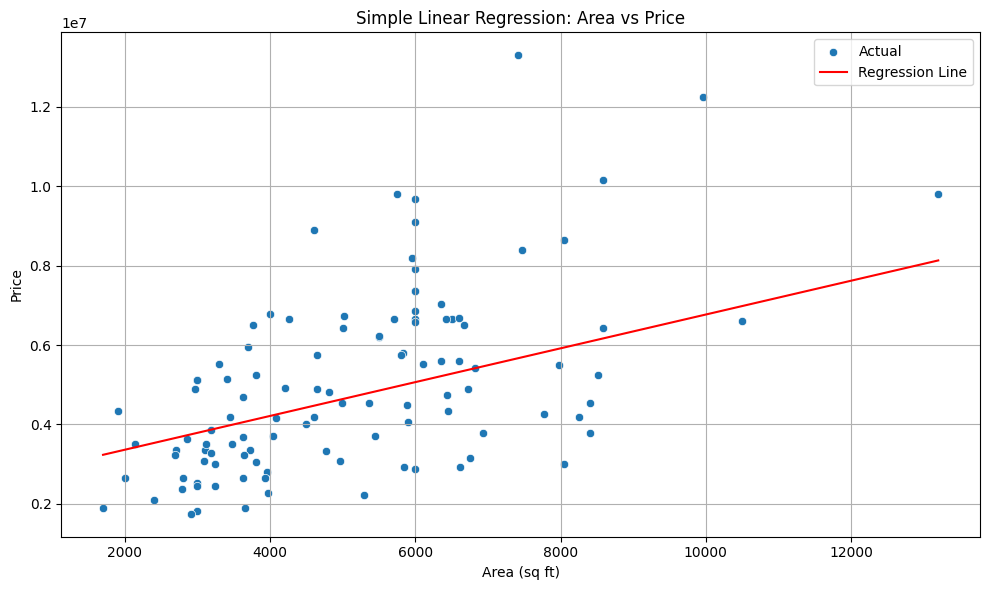

In [6]:
# Plotting Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_s['area'], y=y_test_s, label='Actual')
sns.lineplot(x=X_test_s['area'], y=y_pred_s, color='red', label='Regression Line')
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()